In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [202]:
df = pd.read_excel("AIB_History_Training_2014-2020.xlsx", sheet_name='HistoricalTransactions')

In [203]:
df = df.drop(columns=["FileFolder", "FileName", "Report_Title", "Report_RunDate", "Report_AsOfDate", "Currency", "Institution", "Branch", "TransactionBackdateFlag", "TransactionCode", "TransactionGroup"])
df.set_index("Report_TransactionEffectiveDate", inplace=True)
df.head()

,TransactionAmount
Report_TransactionEffectiveDate,
2013-12-30,-972.619715
2013-12-30,-75.956876
2013-12-30,127.430470
2013-12-30,-38.300469
2013-12-30,-117.467137


In [204]:
# Turn all transactions positive
df["TransactionAmount"] = df["TransactionAmount"].apply(abs)

# Daily
daily_data = df.groupby('Report_TransactionEffectiveDate')["TransactionAmount"].sum()
weekly_data = df.resample('W').sum()
monthly_data = df.resample('M').sum()


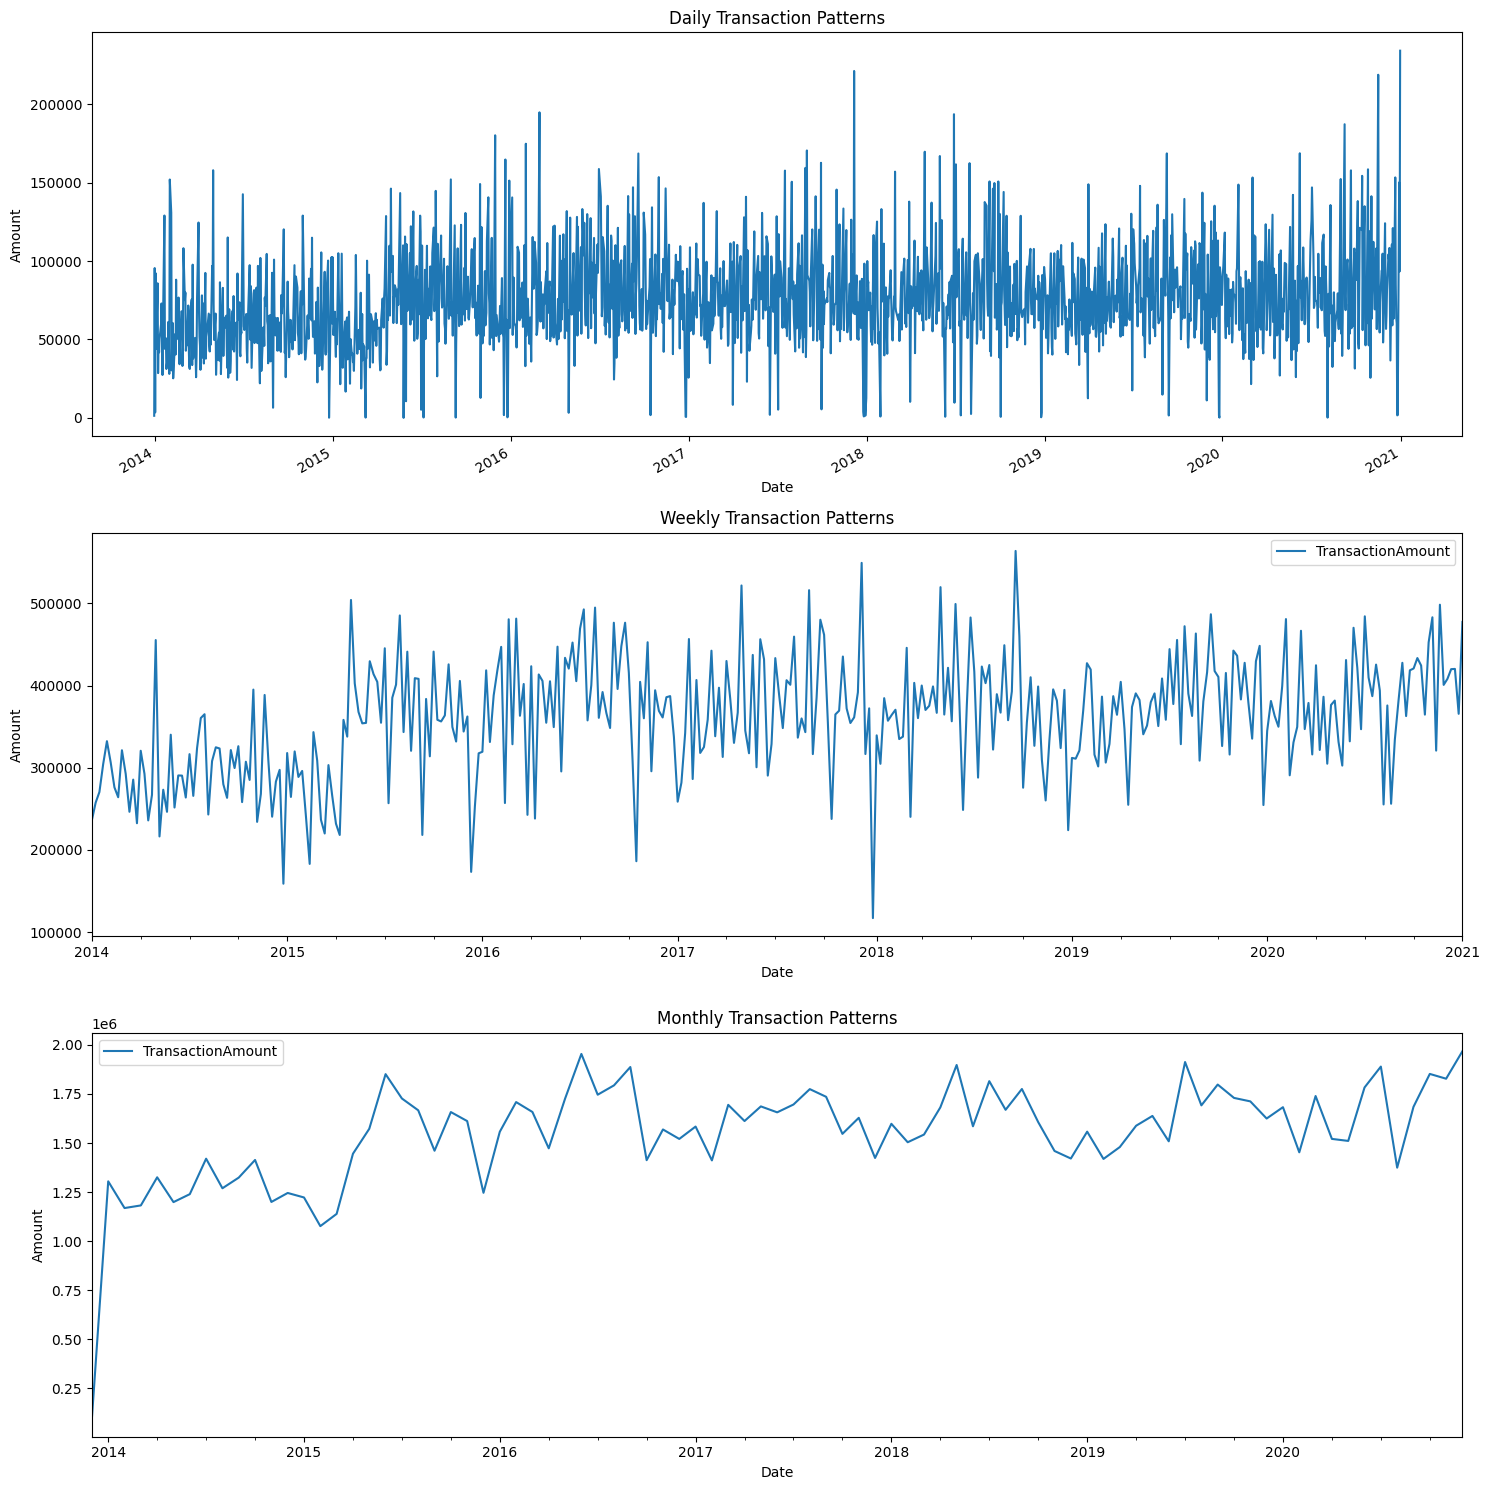

In [205]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
    
# Daily pattern
daily_data.plot(ax=axes[0], title='Daily Transaction Patterns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Amount')
    
    # Weekly pattern
weekly_data.plot(ax=axes[1], title='Weekly Transaction Patterns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Amount')
    
    # Monthly pattern
monthly_data.plot(ax=axes[2], title='Monthly Transaction Patterns')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Amount')
    
plt.tight_layout()
plt.show()